<a href="https://colab.research.google.com/github/konerjonlar/Akbank-Makine-Ogrenmesi-Bootcamp/blob/main/Housing_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [81]:
# for data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# for z-score
from scipy import stats
# for modellling and evaluating performance of the model
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Project Definition

For this project, we need to load the Melbourne Housing dataset into our project. The
quality and amount of data we collect will determine how good our predictive model
can be. For this reason, we need to examine the dataset very carefully. We will
estimate the price of a house using the Melbourne Housing dataset, which is a
real-life example. Before evaluating any cost, we will start by analyzing the data
using preprocessing techniques. We will then build our models and measure their
performance to complete the project.

# Gathering and Observing Data

## Load the dataset to the project with the help of read_csv() and observe the first 5 columns

In [82]:
# Load dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Observe the 5 columns
df.iloc[:, :5].head()


,Suburb,Address,Rooms,Type,Price
0,Abbotsford,68 Studley St,2,h,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0
3,Abbotsford,18/659 Victoria St,3,u,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0


## Find the shape, number of columns and size of the dataset

In [83]:
# Find the shape, number of columns and size of the dataset
print("\nShape of the Dataset:\n", df.shape,
"\nNumber of Columns:\n", len(df.columns),
"\nSize of the Dataset:\n", df.size)


Shape of the Dataset:
 (34857, 21) 
Number of Columns:
 21 
Size of the Dataset:
 731997


## Show the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [84]:
# Display general information about the dataset
print("\nColumn Labels:", df.columns.tolist(),
      "\nColumn Data Types:", df.dtypes,
      "\nMemory Usage:", df.memory_usage(),
      "\nRange Index:", df.index,
      "\nNumber of cells in each column (non-null values):", df.count(), sep="\n")


Column Labels:
['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']

Column Data Types:
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

Memory Usage:
Index               128
Suburb           278856
Address          278856
Rooms            278856
Type             278856
Price            278856
Method           278

# Exploratory Data Analysis

## Examine the descriptive statistics of dataset

In [85]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


## The values of some variables are given as objects. At the same time, we observe that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.

In [86]:
# Convert these columns to categorical data type
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

In [87]:
# Select the relevant numerical columns
numerical_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Price']

## Check for duplicate data. If there are duplicate data, clear them from the dataset.

In [88]:
# Check for and remove duplicate data
duplicates = df.duplicated()  # Find duplicate rows
df_no_duplicates = df[~duplicates]  # Create a new DataFrame without duplicates

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Update the original DataFrame to contain only the non-duplicate data
df = df_no_duplicates

Number of duplicate rows: 1


In [89]:
dropp = ["Address","Date"]
df.drop(dropp,inplace = True,axis = 1)
categorical_columns.remove("Address")
categorical_columns.remove("Date")

<ipython-input-89-20cb732d857b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(dropp,inplace = True,axis = 1)


## Clear outlier data in the dataset. When you examine the dataset, you will observe that the outlier data is generally in the "Landsize" and "Buildingarea" variables.

In [90]:
# Calculate z-scores for 'Landsize' and 'BuildingArea'
z_scores_landsize = np.abs(stats.zscore(df['Landsize']))
z_scores_building_area = np.abs(stats.zscore(df['BuildingArea']))

# Define a z-score threshold for identifying outliers
z_score_threshold = 3

# Create boolean masks to identify outlier rows
outliers_landsize = z_scores_landsize > z_score_threshold
outliers_building_area = z_scores_building_area > z_score_threshold

# Remove rows with outliers
df = df[~(outliers_landsize | outliers_building_area)]

In [91]:
for col in numerical_columns:
    z_scores = np.abs(stats.zscore(df[col], nan_policy="omit"))
    outliers = z_scores < z_score_threshold
    df = df[(outliers)]

## Find and remove the missing values on the dataset

In [92]:
# Find and remove rows with missing values
df = df.dropna(subset=['Bathroom', 'Car'])

# Fill missing values with the mode
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode().idxmax())
df['Car'] = df['Car'].fillna(df['Car'].mode().idxmax())
df = df.reset_index(drop=True)

## Data Visualization

### Build a Histogram to visualize price distribution

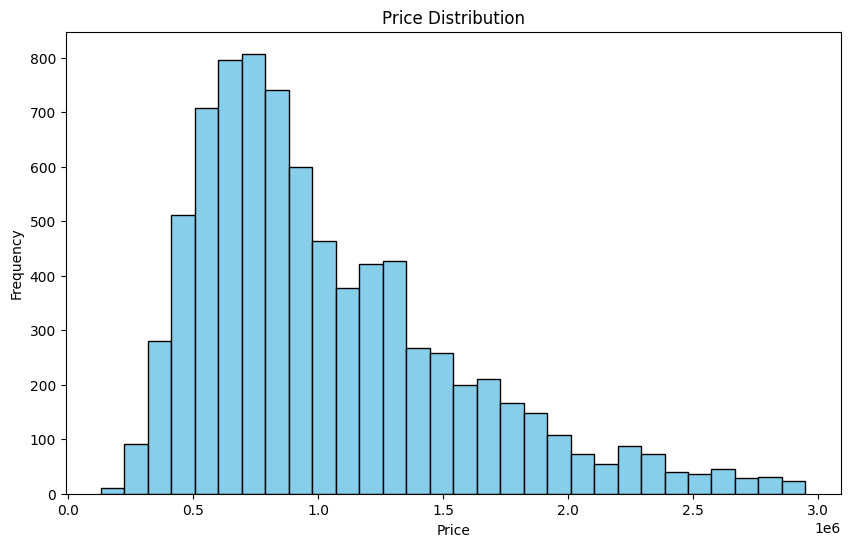

In [93]:
# Create a histogram for the 'Price' variable
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')  # Plot the histogram
plt.title('Price Distribution')  # Set the title
plt.xlabel('Price')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Show the histogram
plt.show()

### Draw a pair plot to see the relationship between all numerical variables and the price variable

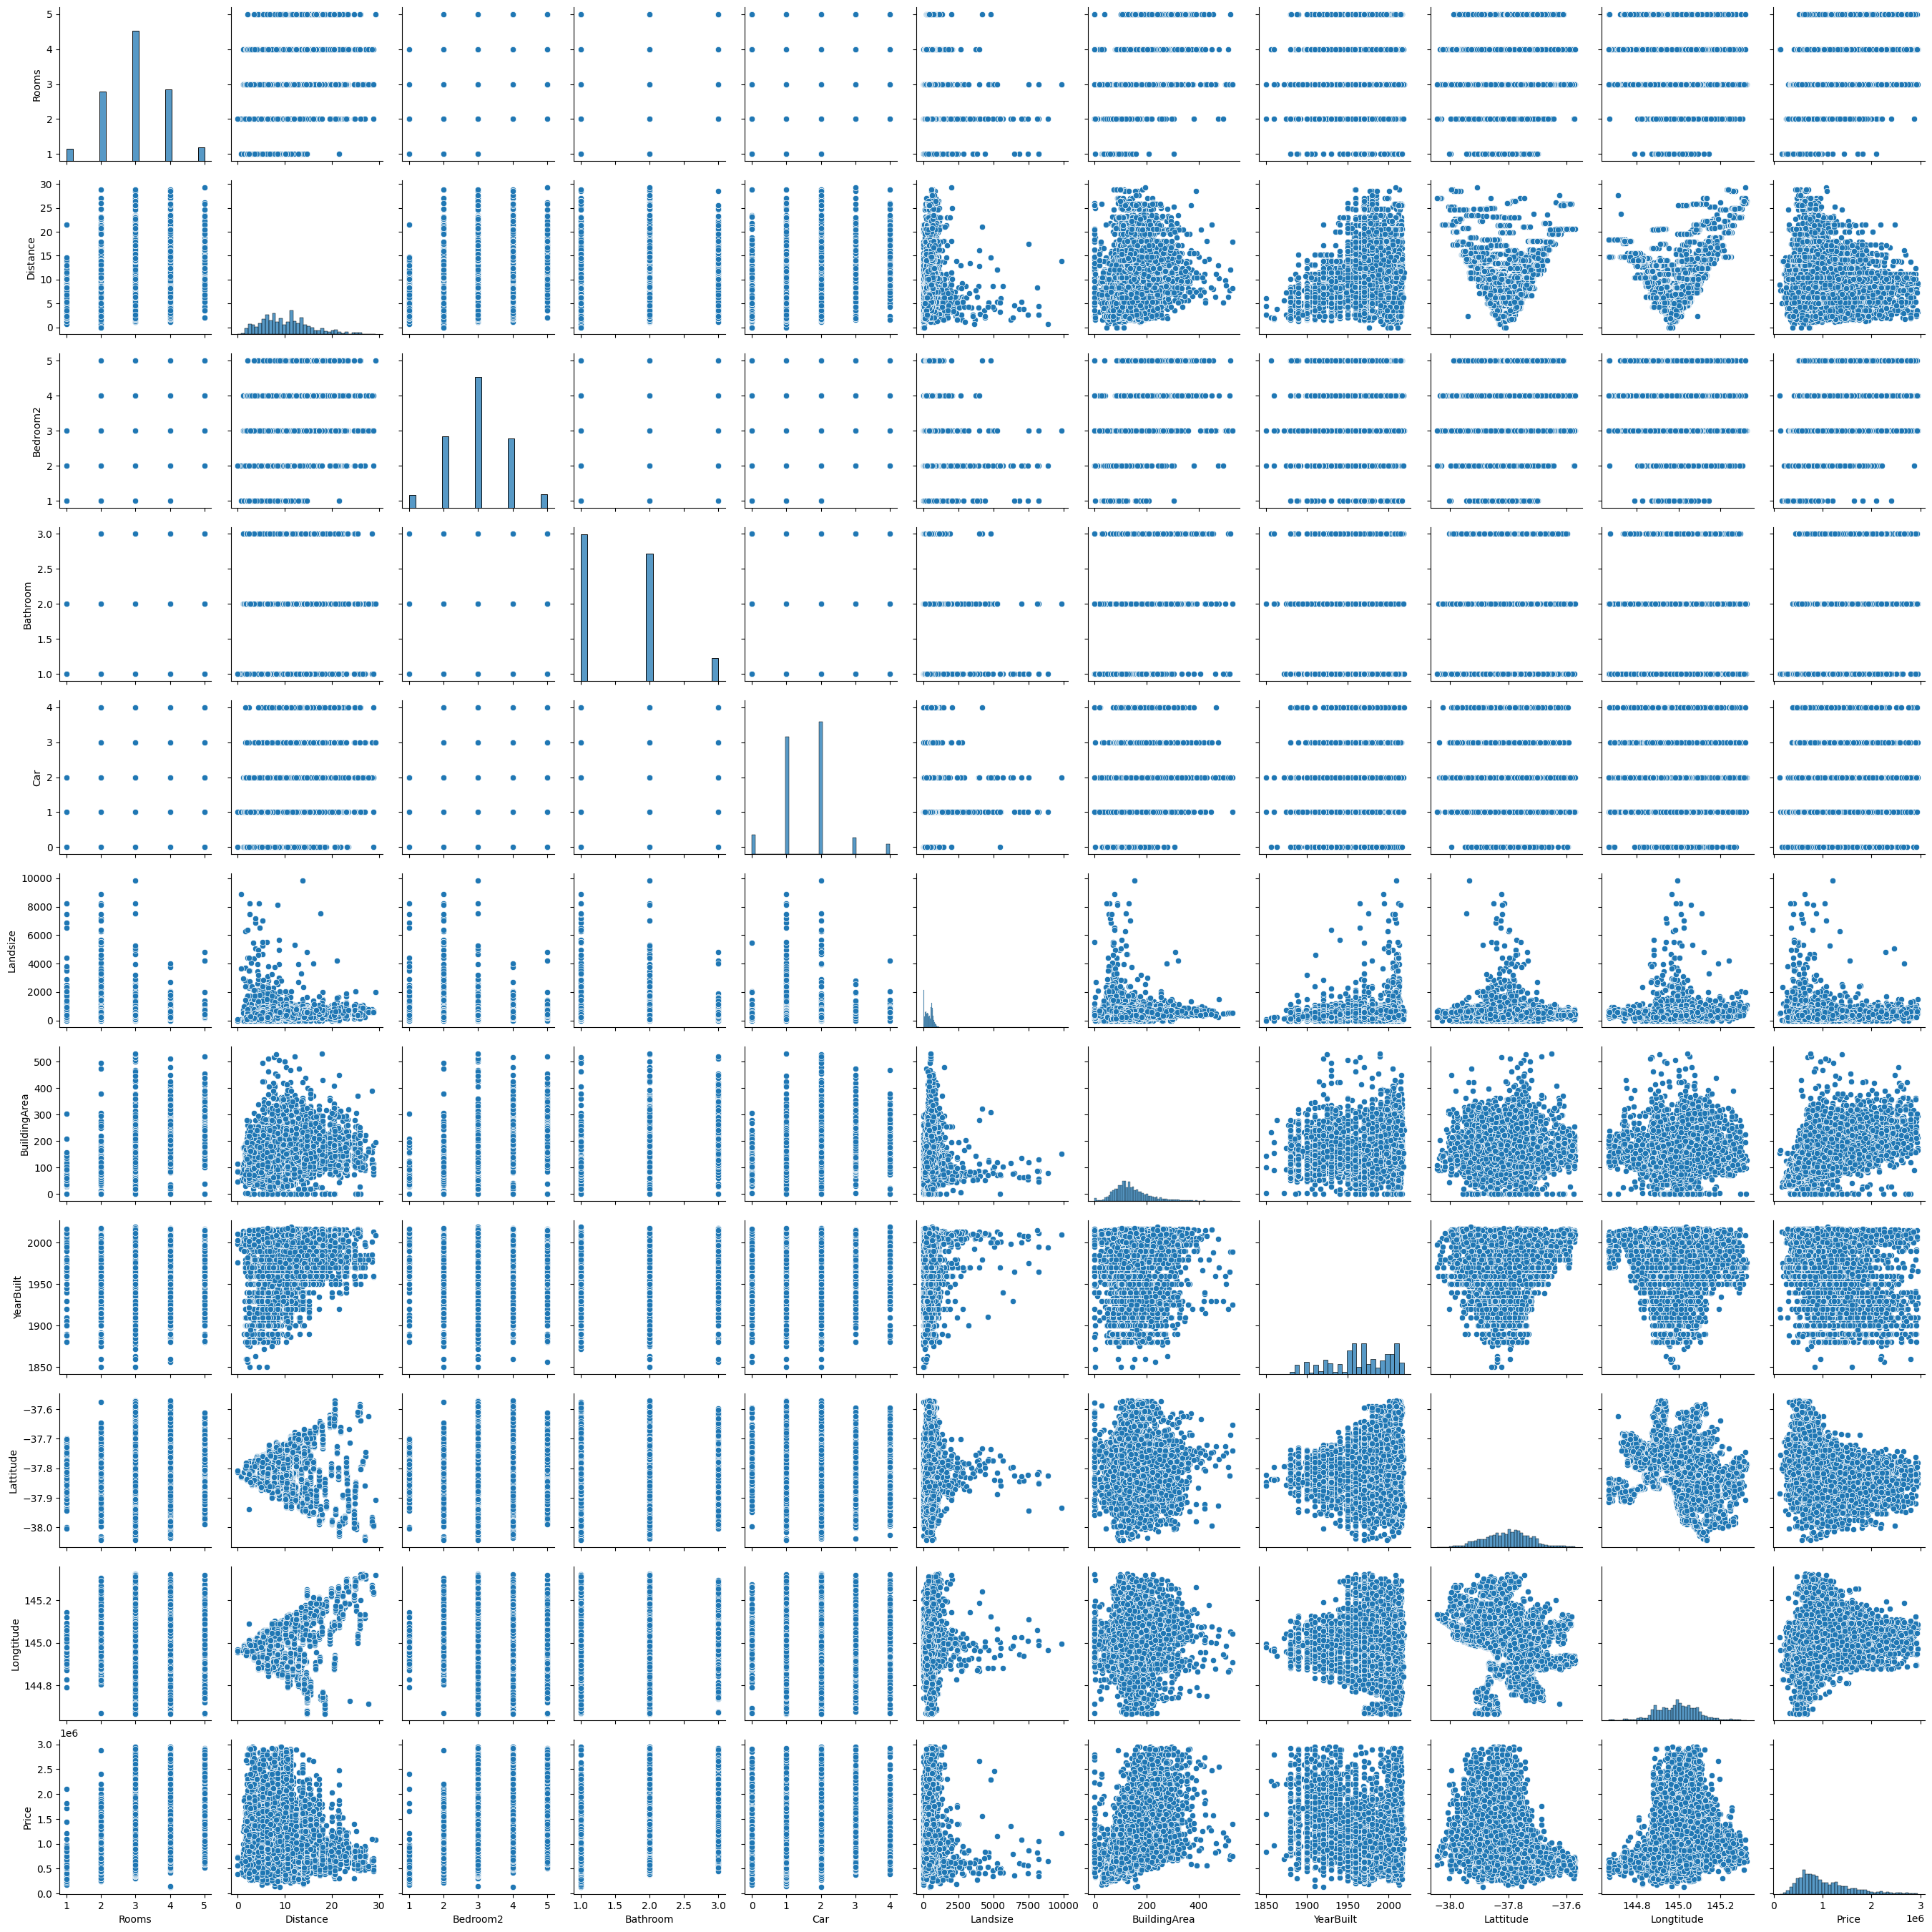

In [94]:
# Create a pair plot
sns.pairplot(df[numerical_columns])
plt.show()

### Draw a correlation matrix by using a heatmap on seaborn

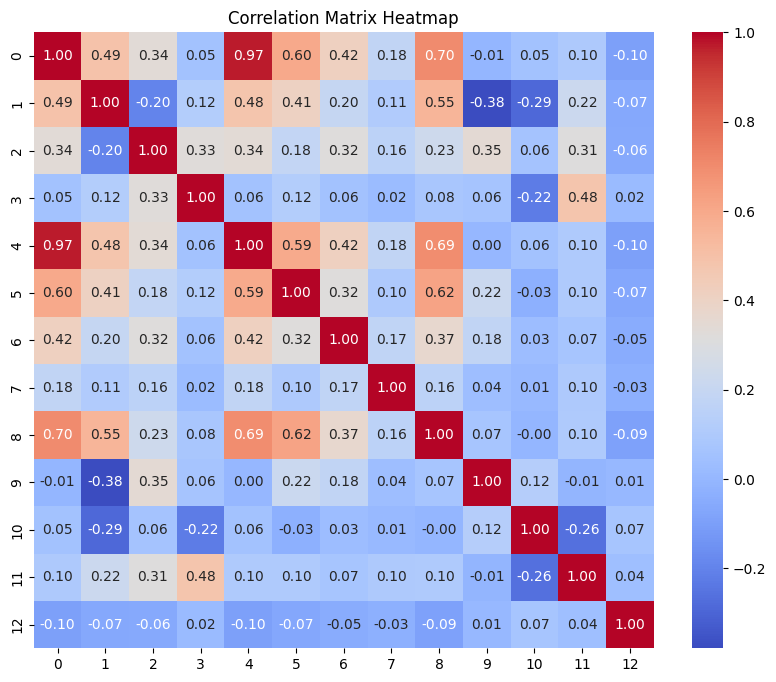

In [95]:
# Calculate the correlation matrix
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Convert the correlation matrix to a NumPy array
correlation_matrix_array = correlation_matrix.to_numpy()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix_array, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()

### Implement Label Encoder and One Hot encoder for categorical variables

In [96]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding for ordinal variables
for column in categorical_columns:
    if df[column].nunique() <= 5:
        df[column] = label_encoder.fit_transform(df[column])

# Apply One-Hot Encoding for nominal variables
df = pd.get_dummies(df, columns=[col for col in categorical_columns if df[col].nunique() > 5], drop_first=True)

# Model Selection

## Since we are going to make a price estimation, we need to determine our x and y variables correctly.

In [97]:
df = df.dropna()
X = df.drop("Price", axis=1)
y = df["Price"]

## Splitting our data into train-test in order to increase the performance of model training

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Model Evaluation

## Comparing models in each other

In [99]:
estimator = DecisionTreeRegressor()

models = {
'Lasso': Lasso(),
'LinearRegression': LinearRegression(),
'Ridge': Ridge(),
'ElasticNet': ElasticNet(),
'KNeighborsRegressor': KNeighborsRegressor(),
'RandomForestRegressor': RandomForestRegressor(),
'GradientBoostingRegressor': GradientBoostingRegressor(),
'AdaBoostRegressor': AdaBoostRegressor(n_estimators = 20, learning_rate = 1, loss = 'exponential', random_state = 42, estimator=estimator)}

In [100]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    mae = mean_absolute_error(y_test, predict)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predict)

    print(f"##########{model_name}##########")
    print("Mean Absolute Error  ",mae)
    print("Mean Seqaure Error  ",mse)
    print("R Mean Seqaure Error  ",rmse)
    print("R2  ",r2)
    print("Model Score  ",model.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+14, tolerance: 1.714e+11
  model = cd_fast.enet_coordinate_descent(


##########Lasso##########
Mean Absolute Error   176512.26423762407
Mean Seqaure Error   54901972500.30245
R Mean Seqaure Error   234311.69945246534
R2   0.7908667301270698
Model Score   0.7908667301270698
##########LinearRegression##########
Mean Absolute Error   176680.53062120712
Mean Seqaure Error   55023283131.59142
R Mean Seqaure Error   234570.42254212577
R2   0.7904046321761871
Model Score   0.7904046321761871
##########Ridge##########
Mean Absolute Error   175725.3141788338
Mean Seqaure Error   54519647344.199455
R Mean Seqaure Error   233494.42679472984
R2   0.7923230878207768
Model Score   0.7923230878207768
##########ElasticNet##########
Mean Absolute Error   213246.75708220925
Mean Seqaure Error   84797069330.26607
R Mean Seqaure Error   291199.36354715144
R2   0.6769899590659988
Model Score   0.6769899590659988
##########KNeighborsRegressor##########
Mean Absolute Error   197745.0678536103
Mean Seqaure Error   86431591832.9733
R Mean Seqaure Error   293992.5030217153
R2   

## Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE, R2)


> RandomForestRegressor
*  Mean Absolute Error   
 133564.98472469504
*  Mean Seqaure Error    
 40548317380.25993
*  R Mean Seqaure Error  
 201366.12768849664
*  R2                    
 0.8455428500035693
*  Model Score           
 0.8455428500035693

This model has the lowest MAE and MSE values and the highest R² value. Therefore, it appears to deliver the best performance for your dataset. The model score is also quite high (0.8455).